<a href="https://colab.research.google.com/github/brkent/SummerStudent2022/blob/main/example06_vlass_fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aplpy

In [ ]:
# Brian R. Kent, NRAO
# Loading and displaying a VLASS FITS image and subplot

# IMPORTS ----------------------------------
from astropy.io import fits
from astropy import wcs

import os
import numpy as np
import matplotlib.pyplot as plt
import aplpy
import matplotlib

target_url = 'https://archive-new.nrao.edu/vlass/quicklook/VLASS1.1v2/T12t35/VLASS1.1.ql.T12t35.J231013+073000.10.2048.v1/VLASS1.1.ql.T12t35.J231013+073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'

VLASS_FITS = fits.open(target_url)

INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


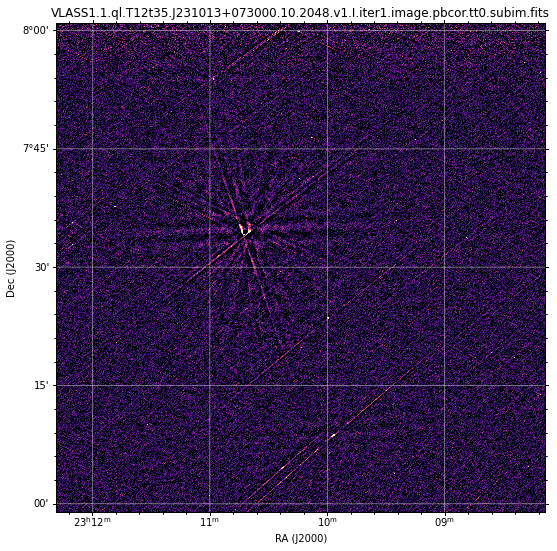

In [ ]:
fig = plt.figure(facecolor='w', edgecolor='w', frameon=True, figsize=(10,9))

ax = aplpy.FITSFigure(VLASS_FITS, figure=fig)

ax.show_colorscale(cmap='magma', vmin=-.0001, vmax=0.00080)
ax.add_grid()
ax.grid.show()
ax.set_title(os.path.basename(target_url))

fig.canvas.draw()

In [ ]:
VLASS_FITS[0].data.shape

(1, 1, 3722, 3722)

In [ ]:
from astropy.wcs import WCS
WCS(VLASS_FITS[0].header)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 347.5562747418335  7.499954731717397  3000000000.0  1.0  
CRPIX : 1861.0  1861.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.0002777777777778  0.0002777777777778  2071820848.452  1.0  
NAXIS : 3722  3722  1  1

In [ ]:
WCS(VLASS_FITS[0].header, naxis=2)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 347.5562747418335  7.499954731717397  
CRPIX : 1861.0  1861.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0002777777777778  0.0002777777777778  
NAXIS : 3722  3722  1  1

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.nddata import Cutout2D

VLASS_FITS = fits.open(target_url)

wcs = WCS(VLASS_FITS[0].header, naxis=2)

position = SkyCoord('23h10m42.00s +07d34m15.7s', frame='icrs')
size = 3.0 * u.arcmin

cutout = Cutout2D(VLASS_FITS[0].data[0,0,:,:], position=position, size=size, wcs=wcs)

hdu = fits.PrimaryHDU(cutout.data)
hdu.header.update(cutout.wcs.to_header())


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [ ]:
hdu.data.shape

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


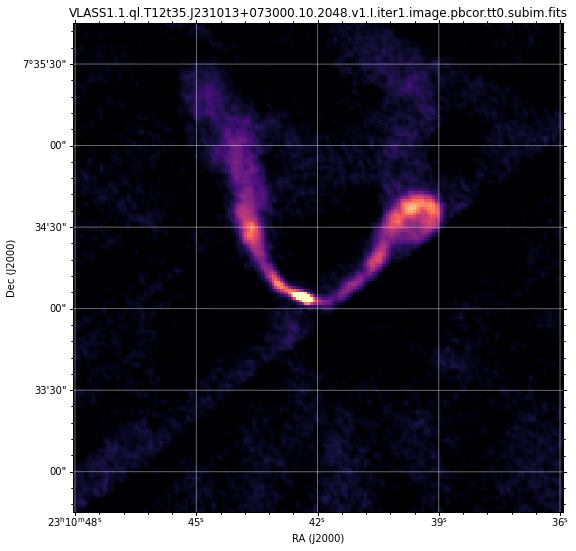

In [ ]:
fig = plt.figure(facecolor='w', edgecolor='w', frameon=True, figsize=(10,9))

ax = aplpy.FITSFigure(hdu, figure=fig)

ax.show_colorscale(cmap='magma', vmin=-.0001, vmax=0.005)
ax.add_grid()
ax.grid.show()
ax.set_title(os.path.basename(target_url))

fig.canvas.draw()